In [1]:
# Check the PEP8 norm for each cell
%load_ext nb_black

<IPython.core.display.Javascript object>

P7 Description <br>

This last part is dedicated to select the best hyperparameters for the selected model(s).


$\;\;\;\;\;\;$ Imports <br>
Part - 3 Hyper parameters Tuning <br>
$\;\;\;\;\;\;$ [Logistic Regression](#LR) <br>
$\;\;\;\;\;\;$ [Light Gradient Boosting Machine](#LGB) <br>
$\;\;\;\;\;\;$ [Benefit function](#Benefit) <br>
$\;\;\;\;\;\;$ [Pickle export](#pic) <br>

#### imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<IPython.core.display.Javascript object>

In [3]:
# col width
pd.set_option("max_colwidth", 240)
# option to be able see all columns
pd.set_option("max_columns", None)
# max lanes display
pd.options.display.max_rows = 250

<IPython.core.display.Javascript object>

In [4]:
import time

<IPython.core.display.Javascript object>

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

In [6]:
from sklearn.preprocessing import RobustScaler

<IPython.core.display.Javascript object>

In [7]:
# ARI score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster, metrics

<IPython.core.display.Javascript object>

In [8]:
# Cross-validation evaluation of Supervised algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer

<IPython.core.display.Javascript object>

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve

<IPython.core.display.Javascript object>

#### modeling

In [10]:
from statistics import mean
from numpy import std
from collections import Counter

<IPython.core.display.Javascript object>

In [11]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

<IPython.core.display.Javascript object>

#### others

In [12]:
from IPython.display import Image

<IPython.core.display.Javascript object>

#### data loading

In [63]:
start = time.time()

X_train = pd.read_csv("X_train.csv", index_col=[0])
y_train = pd.read_csv("y_train.csv", index_col=[0])
X_test = pd.read_csv("X_test_na.csv", index_col=[0])
y_test = pd.read_csv("y_test_na.csv", index_col=[0])

end = time.time()
print("total time: ", (end - start), "sec")

total time:  1.8306660652160645 sec


<IPython.core.display.Javascript object>

In [64]:
X_train.shape

(246005, 94)

<IPython.core.display.Javascript object>

In [14]:
X_train["TARGET"] = y_train

<IPython.core.display.Javascript object>

In [15]:
print("before sampling :", X_train.shape)
X_train = X_train.sample(frac=0.6, random_state=18)
print("after sampling :", X_train.shape)

before sampling : (246005, 95)
after sampling : (9840, 95)


<IPython.core.display.Javascript object>

In [16]:
X_train.head(1)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,TARGET
187269,0.0,0.0,0.0,1.0,0.0,202500.0,819432.0,29160.0,684000.0,-12983.0,-1597.0,-7095.0,-2231.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503711,0.64242,0.501075,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123007,0.247122,101250.0,0.144,0.035586,0


<IPython.core.display.Javascript object>

In [17]:
y_train = X_train["TARGET"].values
X_train = X_train.drop("TARGET", axis=1)

<IPython.core.display.Javascript object>

# Part - 3 Hyper parameters Tuning

In [18]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 9056]
 [   1  784]]


<IPython.core.display.Javascript object>

<a id='eval' />

### Evaluation of the model and metrics

In [19]:
# Fonction recap
def predic_matrix(name, model, params, score_metric):
    start_grid = time.time()

    Search = GridSearchCV(
        model, params, scoring=score_metric, n_jobs=1, cv=5, refit=True
    )

    # execute search
    Search.fit(X_train, y_train)

    end_grid = time.time()
    print("total time for the Grid Search: ", (end_grid - start_grid), "sec")
    print("--" * 5)

    best_model = Search.best_estimator_
    print("best model params:", best_model)
    print("--" * 5)

    start_fit = time.time()
    best_model.fit(X_train, y_train)
    end_fit = time.time()
    Predict_time = (round((end_fit - start_fit), 3), "sec")

    y_pred_l = best_model.predict(X_test)
    y_pred_p = best_model.predict_proba(X_test)

    Test_score = best_model.score(X_test, y_test)
    print("SCORES :")
    print("Best Score: %s" % Search.best_score_)
    print("test score :", Test_score)
    print("--" * 5)

    cm = confusion_matrix(y_test, y_pred_l, labels=[0, 1])
    group_names = ["TN", "FP", "FN", "TP"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]

    labels = np.asarray(labels).reshape(2, 2)

    print("Confusion Matrix")
    print(cm)
    print("--" * 5)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_p[:, 1], pos_label=1)
    # metrics.auc(fpr, tpr)
    # roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

    precision, recall, _ = precision_recall_curve(y_test, y_pred_p[:, 1])

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_l).ravel()

    FPR = fp / (fp + tp)
    FNR = fn / (fn + tn)

    print("TP (true=1/pred=1):", tp)
    print("TN (true=0/pred=0):", tn)
    print("FN (true=1/pred=0):", fn)
    print("FP (true=0/pred=1):", fp)
    print("--" * 5)

    Report = [
        name,
        score_metric,
        mean(Search.cv_results_["mean_test_score"]),
        mean(Search.cv_results_["std_test_score"]),
        mean(Search.cv_results_["mean_fit_time"]),
        mean(Search.cv_results_["std_fit_time"]),
        Predict_time,
        Test_score,
        FPR,
        FNR,
    ]

    end_tot = time.time()
    print("temps total: ", (end_tot - start_grid), "sec")

    # figure
    fig = plt.figure(figsize=(20, 6))

    # Create each subplot individually
    plt.subplot(1, 3, 1)
    sns.heatmap(
        cm,
        cmap="Greens",
        fmt="",
        annot=labels,
        # cbar_kws={"orientation": "vertical", "label": "color bar"},
        xticklabels=[0, 1],
        yticklabels=[0, 1],
    )
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Roc auc curve")

    # plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.subplot(1, 3, 3)
    plt.plot(recall, precision, marker=".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Recall precision curve")

    # One Title
    plt.suptitle("Summary Plots")

    # Auto adjust
    plt.tight_layout()

    # Display
    plt.show()

    return Report, y_pred_l, y_pred_p, best_model

<IPython.core.display.Javascript object>

### Custom_score

In [20]:
def fonction_metier(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (tp / (tp + fn)) - (33 * (fn / (tp + fn)))

<IPython.core.display.Javascript object>

In [21]:
custom_score = make_scorer(fonction_metier, greater_is_better=True)

<IPython.core.display.Javascript object>

## Base parameters for the GridSearches !

<a id='LR' />

### Logistic Regression

In [22]:
# LogisticRegression
LR = make_pipeline(RobustScaler(), LogisticRegression(),)

<IPython.core.display.Javascript object>

In [23]:
LR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'robustscaler', 'logisticregression', 'robustscaler__copy', 'robustscaler__quantile_range', 'robustscaler__unit_variance', 'robustscaler__with_centering', 'robustscaler__with_scaling', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

<IPython.core.display.Javascript object>

In [24]:
# define the searching space for the LR
LR_param = dict()
LR_param["logisticregression__C"] = [100, 10, 1.0, 0.1, 0.01]
LR_param["logisticregression__solver"] = ["lbfgs", "sag", "saga", "newton-cg"]
LR_param["logisticregression__max_iter"] = [1500]
LR_param["logisticregression__random_state"] = [18]
LR_param["logisticregression__class_weight"] = ["balanced"]
LR_param["logisticregression__penalty"] = ["none", "l1", "l2", "elasticnet"]

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalt

total time for the Grid Search:  113.96325850486755 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight='balanced',
                                    max_iter=1500, penalty='none',
                                    random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


SCORES :
Best Score: -11.749028254123795
test score : 0.6782479660236401
----------
Confusion Matrix
[[12247  5837]
 [  451  1008]]
----------
TP (true=1/pred=1): 1008
TN (true=0/pred=0): 12247
FN (true=1/pred=0): 451
FP (true=0/pred=1): 5837
----------
temps total:  114.70038628578186 sec


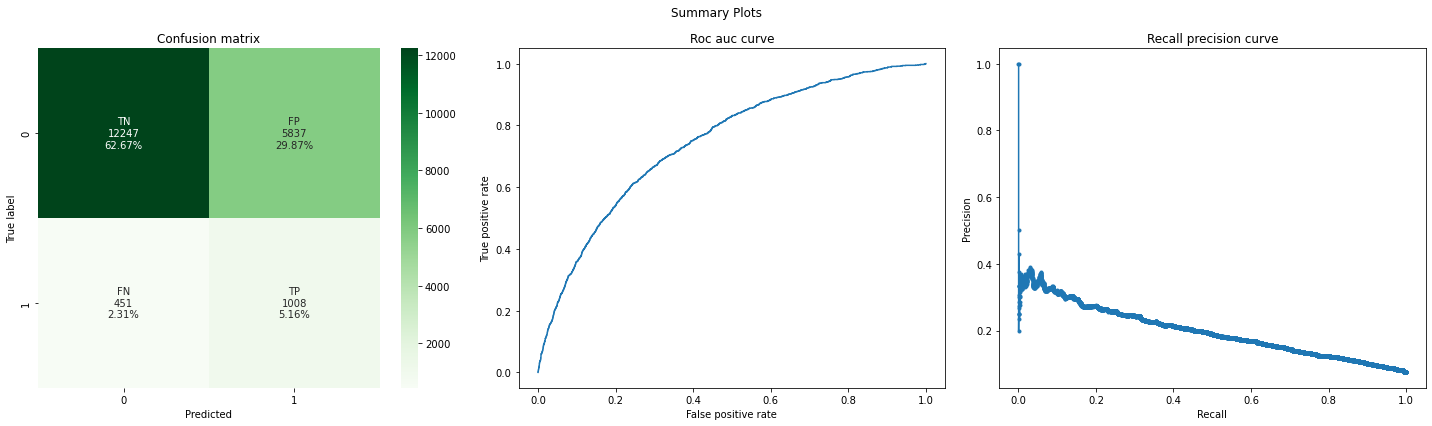

<IPython.core.display.Javascript object>

In [27]:
# Logistic
LR_report, y_pred_l_LR, y_pred_p_LR, LR_best_model = predic_matrix(
    "LR", LR, LR_param, custom_score
)

In [28]:
import shap

<IPython.core.display.Javascript object>

In [29]:
LR.named_steps["logisticregression"]

LogisticRegression()

<IPython.core.display.Javascript object>

In [30]:
log_shap = shap.LinearExplainer(
    LR_best_model.named_steps["logisticregression"], X_train
)

<IPython.core.display.Javascript object>

In [31]:
log_shap_values = log_shap.shap_values(X_test)

<IPython.core.display.Javascript object>

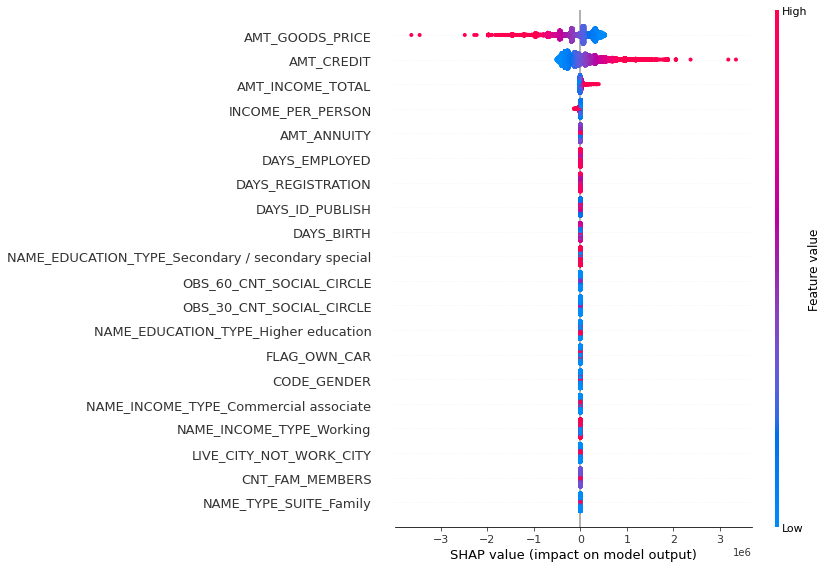

<IPython.core.display.Javascript object>

In [32]:
shap.summary_plot(log_shap_values, X_test)

<a id='LGB' />

### Light Gradient Boosting Machine

In [33]:
Lgb = make_pipeline(RobustScaler(), LGBMClassifier())

<IPython.core.display.Javascript object>

In [34]:
Lgb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'robustscaler', 'lgbmclassifier', 'robustscaler__copy', 'robustscaler__quantile_range', 'robustscaler__unit_variance', 'robustscaler__with_centering', 'robustscaler__with_scaling', 'lgbmclassifier__boosting_type', 'lgbmclassifier__class_weight', 'lgbmclassifier__colsample_bytree', 'lgbmclassifier__importance_type', 'lgbmclassifier__learning_rate', 'lgbmclassifier__max_depth', 'lgbmclassifier__min_child_samples', 'lgbmclassifier__min_child_weight', 'lgbmclassifier__min_split_gain', 'lgbmclassifier__n_estimators', 'lgbmclassifier__n_jobs', 'lgbmclassifier__num_leaves', 'lgbmclassifier__objective', 'lgbmclassifier__random_state', 'lgbmclassifier__reg_alpha', 'lgbmclassifier__reg_lambda', 'lgbmclassifier__silent', 'lgbmclassifier__subsample', 'lgbmclassifier__subsample_for_bin', 'lgbmclassifier__subsample_freq'])

<IPython.core.display.Javascript object>

In [37]:
Lgb_param = dict()
Lgb_param["lgbmclassifier__boosting_type"] = ["gbdt", "dart", "goss"]
Lgb_param["lgbmclassifier__class_weight"] = ["balanced"]
Lgb_param["lgbmclassifier__n_estimators"] = [100, 10000]
Lgb_param["lgbmclassifier__learning_rate"] = [0.001, 0.01, 0.1]
Lgb_param["lgbmclassifier__num_leaves"] = [30, 60]
Lgb_param["lgbmclassifier__colsample_bytree"] = [1]
Lgb_param["lgbmclassifier__subsample"] = [0.5, 0.7, 1]
Lgb_param["lgbmclassifier__max_depth"] = [3, 7, 8]
Lgb_param["lgbmclassifier__reg_alpha"] = [0, 0.5, 1]
Lgb_param["lgbmclassifier__reg_lambda"] = [0, 0.5, 1]
Lgb_param["lgbmclassifier__min_split_gain"] = [0, 0.5, 1]

<IPython.core.display.Javascript object>

In [44]:
Lgb_param

{'lgbmclassifier__boosting_type': ['dart'],
 'lgbmclassifier__class_weight': ['balanced'],
 'lgbmclassifier__n_estimators': [100],
 'lgbmclassifier__learning_rate': [0.01],
 'lgbmclassifier__num_leaves': [34],
 'lgbmclassifier__colsample_bytree': [1],
 'lgbmclassifier__subsample': [0.5]}

<IPython.core.display.Javascript object>

total time for the Grid Search:  18.76226782798767 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='dart', class_weight='balanced',
                                colsample_bytree=1, learning_rate=0.01,
                                n_estimators=1000, num_leaves=34,
                                subsample=0.5))])
----------
SCORES :
Best Score: -18.12368120202515
test score : 0.7749577853963056
----------
Confusion Matrix
[[14352  3732]
 [  666   793]]
----------
TP (true=1/pred=1): 793
TN (true=0/pred=0): 14352
FN (true=1/pred=0): 666
FP (true=0/pred=1): 3732
----------
temps total:  22.725459098815918 sec


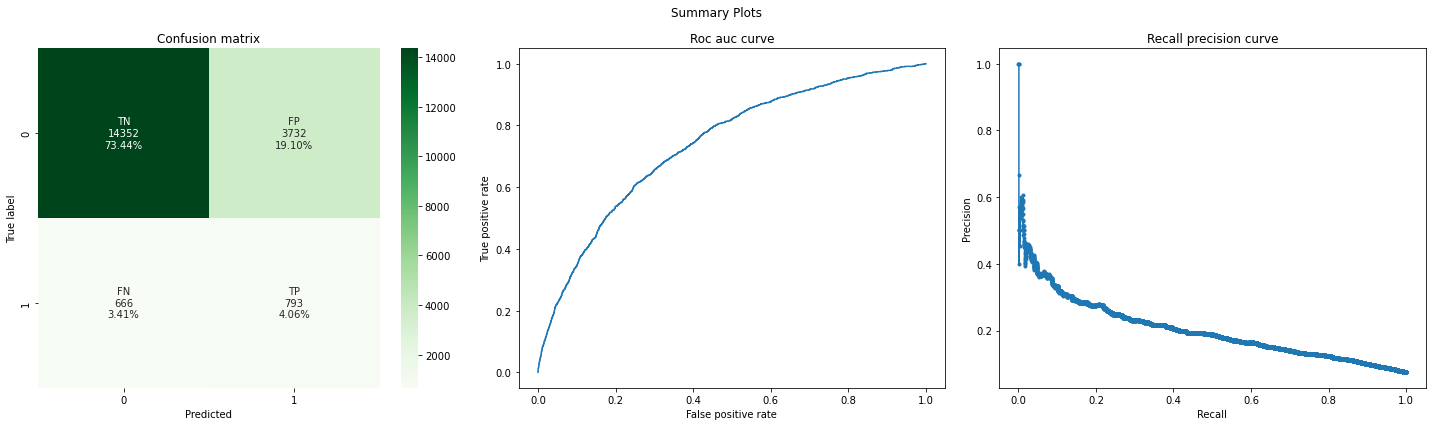

<IPython.core.display.Javascript object>

In [47]:
# LGB
Lgb_report, y_pred_l_Lgb, y_pred_p_Lgb, Lgb_best_model = predic_matrix(
    "Lgb", Lgb, Lgb_param, custom_score
)

In [48]:
lgb_shap = shap.TreeExplainer(Lgb_best_model.named_steps["lgbmclassifier"], X_train)

<IPython.core.display.Javascript object>

In [49]:
lgb_shap_values = lgb_shap.shap_values(X_test)

100%|===================| 19482/19543 [04:24<00:00]        

<IPython.core.display.Javascript object>

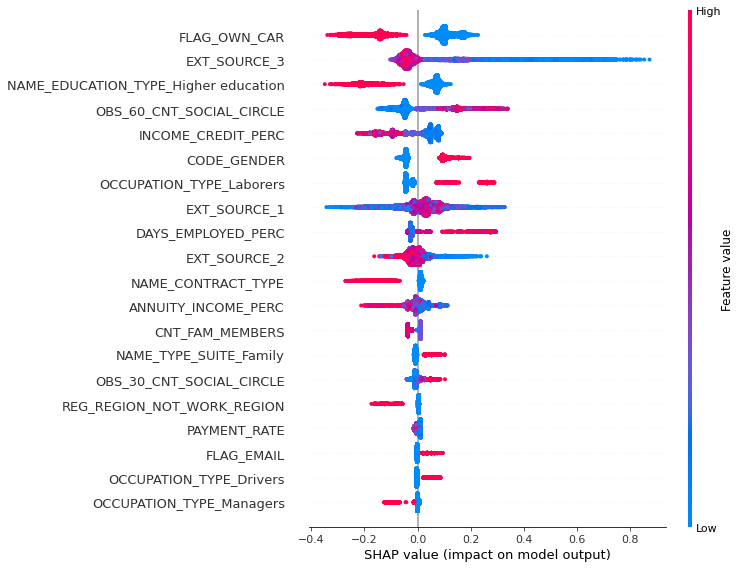

<IPython.core.display.Javascript object>

In [50]:
shap.summary_plot(lgb_shap_values, X_test)

<a id='Benefit' />

### Benefit function

With this function I try to estimate, according to the threshold (i.e. strategy), if we gain or lose money.

In [51]:
df_calcul = X_test.copy()[["AMT_CREDIT", "INCOME_CREDIT_PERC"]]

<IPython.core.display.Javascript object>

In [52]:
df_calcul["interest"] = (
    df_calcul.AMT_CREDIT * (1 + df_calcul.INCOME_CREDIT_PERC)
) / 100

<IPython.core.display.Javascript object>

In [53]:
df_calcul["TARGET"] = y_test

<IPython.core.display.Javascript object>

In [54]:
predictions_one = y_pred_p_Lgb[:, 1]

<IPython.core.display.Javascript object>

In [55]:
df_calcul["predict"] = predictions_one

<IPython.core.display.Javascript object>

In [56]:
df_calcul.head(3)

,AMT_CREDIT,INCOME_CREDIT_PERC,interest,TARGET,predict
SK_ID_CURR,,,,,
124715,571446.0,0.291366,7379.46,0,0.232405
386816,270000.0,0.583333,4275.00,0,0.699055
298922,157500.0,0.828571,2880.00,0,0.281548


<IPython.core.display.Javascript object>

In [57]:
df_calcul.shape

(19543, 5)

<IPython.core.display.Javascript object>

In [58]:
start = time.time()

total = []
for i in range(0, 101, 1):
    a = i / 100
    sum = 0
    for p in range(df_calcul.shape[0]):
        # prediction bon client
        if df_calcul.predict.iloc[p] < a:
            if df_calcul.TARGET.iloc[p] == 0:
                sum = sum + df_calcul.interest.iloc[p]
            else:
                sum = sum - df_calcul.AMT_CREDIT.iloc[p] * 0.25
                # sum = sum - df_calcul.interest.iloc[p] * 10
    #         # prediction mauvais client
    #         if df_calcul.predict.iloc[p] > a:
    #             if df_calcul.TARGET.iloc[p] == 0:
    #                 sum = sum - df_calcul.interest.iloc[p]
    total.append(sum)

end = time.time()
print("total time: ", (end - start), "sec")

total time:  26.806355714797974 sec


<IPython.core.display.Javascript object>

In [59]:
b = np.arange(0, 1.01, 0.01)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Evolution of the benefit with threshold variation')

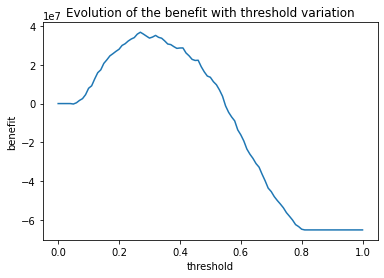

<IPython.core.display.Javascript object>

In [60]:
plt.plot(b, total)
plt.xlabel("threshold")
plt.ylabel("benefit")
plt.title("Evolution of the benefit with threshold variation")

<a id='pic' />

###  Pickle export

#### With pickle, I'll export the best model parameters and fit

In [61]:
import pickle

<IPython.core.display.Javascript object>

In [62]:
# Create Pickle file from the Logistic Regression Classifier(clf)
with open("lgb_best.pickle", "wb") as dump_var:
    pickle.dump(Lgb_best_model, dump_var)

<IPython.core.display.Javascript object>